In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project(WOC)/classification_train.csv" )
Y_train = np.array(df.iloc[0:25000,1:2],dtype='int32')
X_train= np.array(df.iloc[0:25000,2:786],dtype = 'float64')
X_CVS = np.array(df.iloc[25000:30000,2:786],dtype = 'float64')
Y_CVS = np.array(df.iloc[25000:30000,1:2],dtype = 'int32')

In [ ]:
Y_CVS.shape

(5000, 1)

In [ ]:
J = []
iterations = []

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Project(WOC)/classification_test.csv" )
X_test = np.array(df1.iloc[0:10000,1:785])

In [ ]:
class Logistic_Regression:
  def __init__(self,X,Y,learning_rate,epoches):
    self.w = np.zeros((10,X.shape[1]))
    self.b = np.random.randn(10,1)
    Y_modified = self.modify(Y)
    self.Train(X,Y_modified,learning_rate,epoches)
  def modify(self,Y):
    '''Turns the given Y into one hot encoded Y '''
    Y = Y.reshape(1,-1)
    Y_new = np.repeat(Y,10,axis = 0)
    A = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
    Y_new = np.where(Y==A,1,0)
    return Y_new
  def Normalization(self,X):
    #z-score normalization
    self.mu = np.mean(X,axis = 0)
    self.sigma= np.std(X,axis =0)
    X_norm = (X-self.mu)/self.sigma
    return X_norm
  def gradient(self,X,Y):
    m = X.shape[0]#number of training examples 
    n = X.shape[1]#number of features 
    dj_dw = np.zeros((10,n))
    dj_db = 0
    dj_db = np.sum((np.dot(self.w,X.transpose()) + self.b - Y),axis =1,keepdims = True)
    dj_db /= m
    dj_dw = np.dot((np.dot(self.w,X.transpose())+self.b- Y),X)
    dj_dw /= m
    return dj_dw,dj_db
  def Train(self,X,Y,learning_rate,epoches):
    X_norm = self.Normalization(X)
    self.Gradientdescent(X_norm,Y,learning_rate,epoches)
  def Gradientdescent(self,X,Y,learning_rate,epoches):
    for j in range (0,epoches):
      if j%50==0:
        print(f"Cost function at {j} th iteration is :-  {self.cost_function(X,Y)}")
        J.append(self.cost_function(X,Y))
        iterations.append(j)
      dj_dw,dj_db = self.gradient(X,Y)
      self.w -=(learning_rate)*(dj_dw)
      self.b -=  (learning_rate)*(dj_db)
    print(self.w)
    print(self.b)
  def sigmoid(self,Z):
    return 1/(1+np.exp(-Z))
  def cost_function(self,X,Y):
    z = (np.dot(self.w,X.transpose()))
    a = self.sigmoid(z)
    loss = -Y*(np.log(a)) -(1-Y)*(np.log(1-a))
    loss  /= 2*X.shape[0]
    return np.sum(loss,axis = 1)
  def evaluate(self,X_test_data):
    X_test_data_norm= (X_test_data-self.mu)/self.sigma
    Z =  (np.dot(self.w,X_test_data_norm.transpose()) + self.b)
    Z = self.sigmoid(Z)
    Y = np.argmax(Z, axis=0,keepdims = True)
    return Y
  def CVS(self,X_check,Y_check):
    Y_pred = self.evaluate(X_check) 
    return accuracy_score(Y_check.flatten(), Y_pred.flatten())

In [ ]:
Logistic_model = Logistic_Regression(X_train,Y_train,0.01,2000)

Cost function at 0 th iteration is :-  [0.34657359 0.34657359 0.34657359 0.34657359 0.34657359 0.34657359
 0.34657359 0.34657359 0.34657359 0.34657359]
Cost function at 50 th iteration is :-  [0.32563484 0.31447984 0.33124541 0.3253002  0.33002346 0.32928685
 0.3379568  0.32115803 0.31939597 0.31656517]
Cost function at 100 th iteration is :-  [0.3250683  0.31366588 0.33037553 0.32397511 0.32913506 0.32738242
 0.33667675 0.32005472 0.31861589 0.31600249]
Cost function at 150 th iteration is :-  [0.32483097 0.31335925 0.33000493 0.32347622 0.32879037 0.32646267
 0.33602448 0.31951082 0.3182918  0.31573781]
Cost function at 200 th iteration is :-  [0.32468877 0.31319864 0.32979347 0.32321095 0.32860068 0.3259059
 0.33561973 0.31918664 0.31810453 0.31557787]
Cost function at 250 th iteration is :-  [0.32458883 0.31310077 0.32965194 0.32304191 0.32847581 0.32553487
 0.33534205 0.31897322 0.3179773  0.31546938]
Cost function at 300 th iteration is :-  [0.32451257 0.31303457 0.32954774 0.322

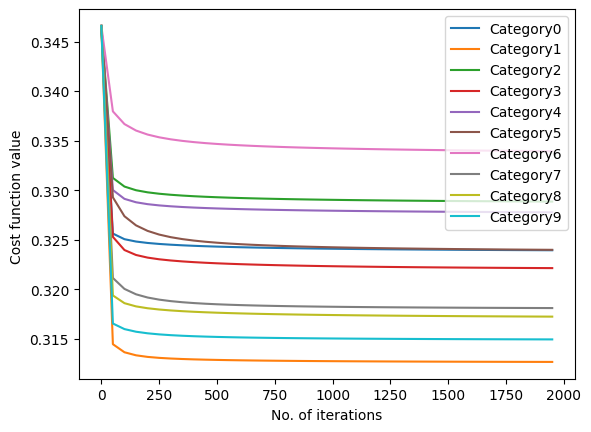

In [ ]:
plt.xlabel("No. of iterations")
plt.ylabel("Cost function value ")
J = np.array(J)
for i in range (10):
  plt.plot(iterations,J[:,i],label = "Category"+ str(i))
plt.legend()
plt.show()

In [ ]:
print(Logistic_model.CVS(X_CVS,Y_CVS.reshape(1,-1)))

0.8202


In [ ]:
output = Logistic_model.evaluate(X_test)
df1["output label"]=output.transpose()
a = np.array(df1.columns)
df2 = df1.drop(a[1:-1],axis = 1 )
df2
df2.to_csv('/content/drive/MyDrive/Project(WOC)/logistic_regression_output(2).csv')

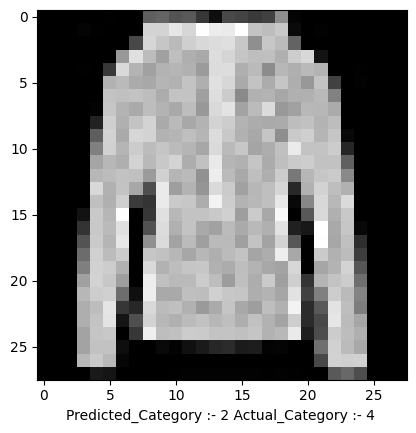

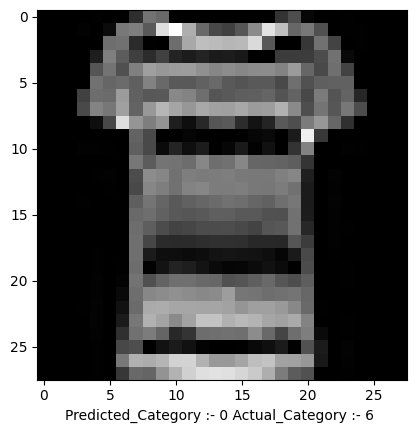

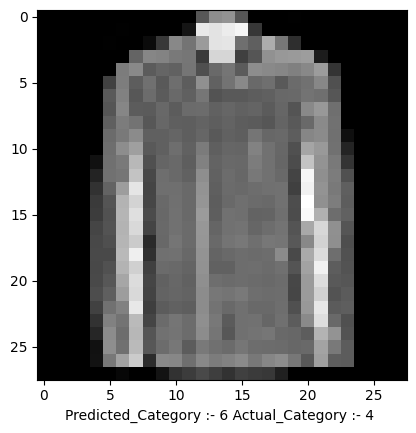

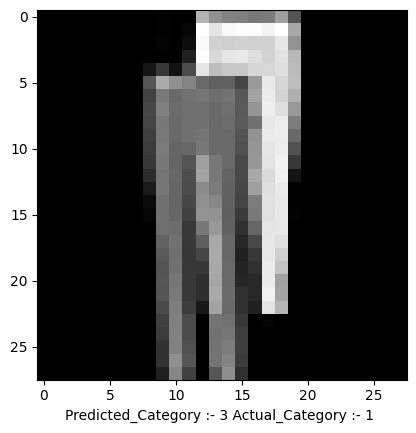

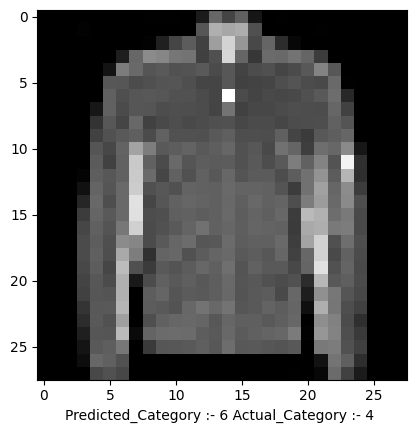

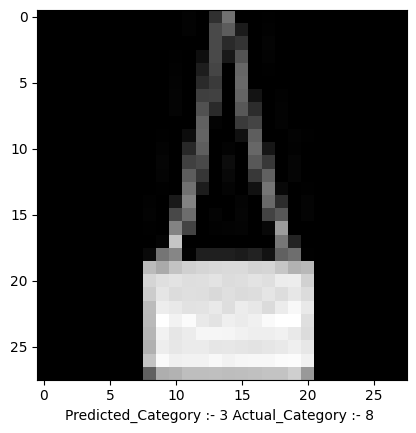

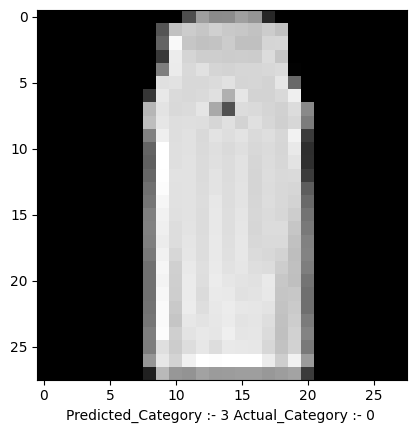

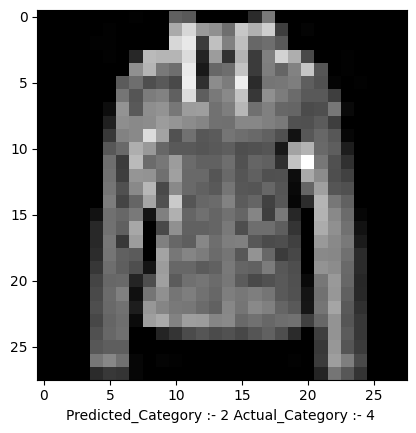

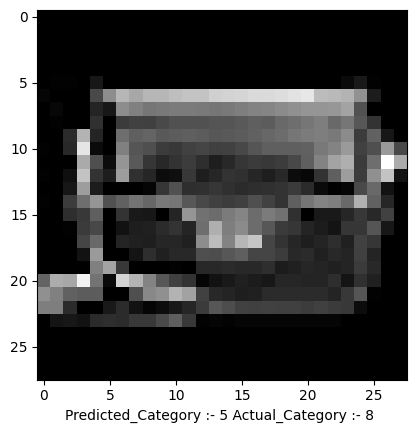

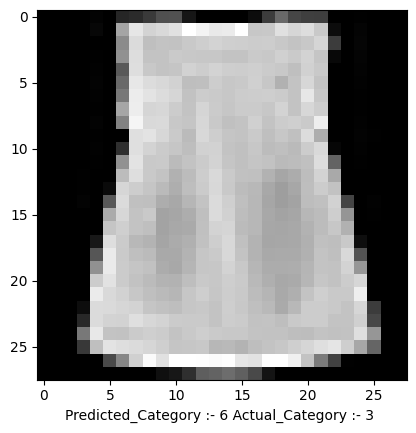

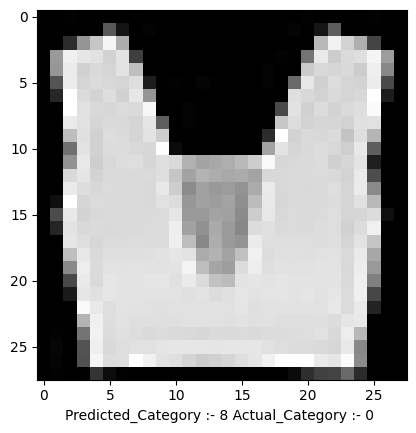

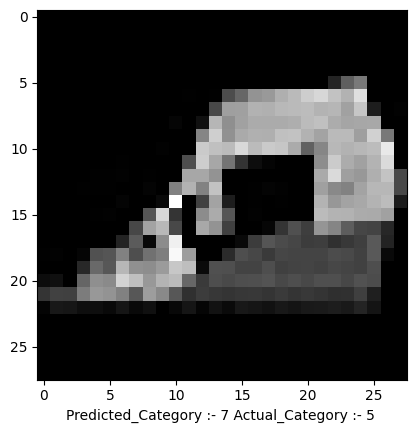

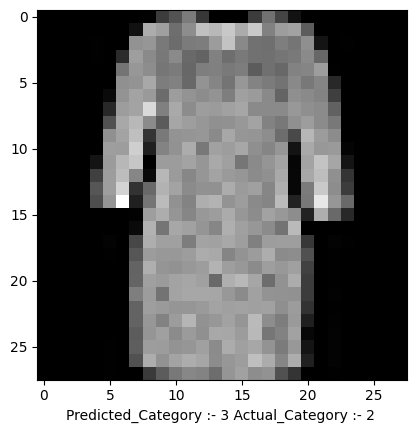

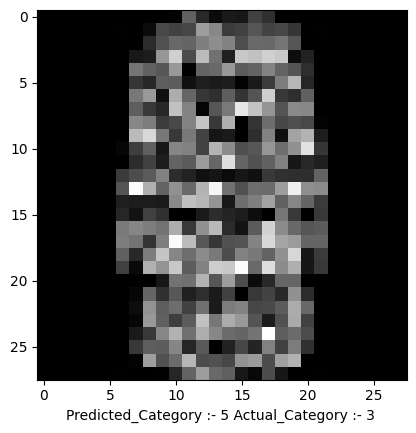

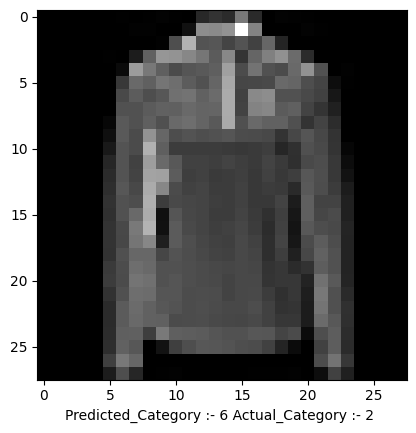

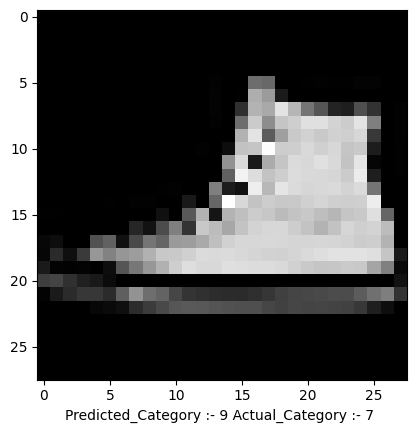

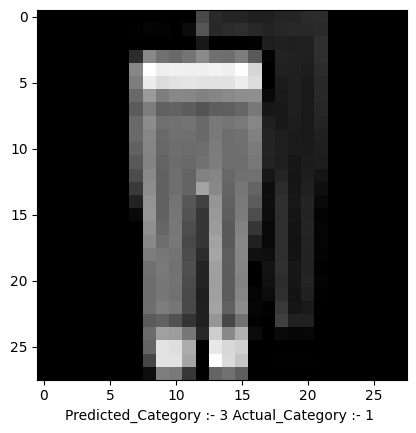

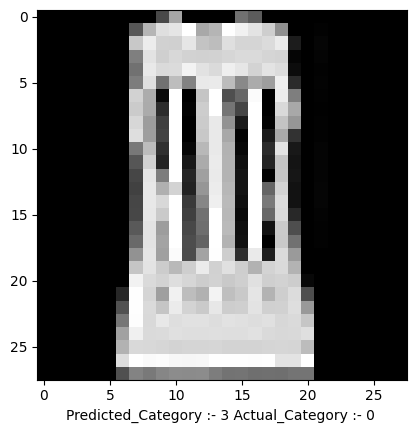

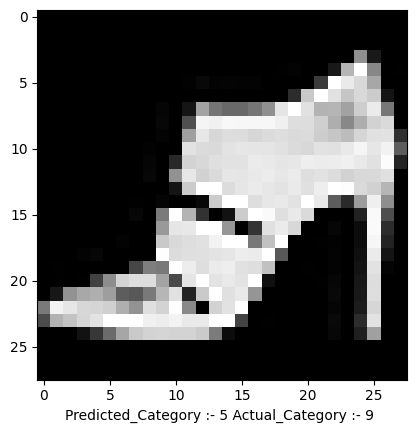

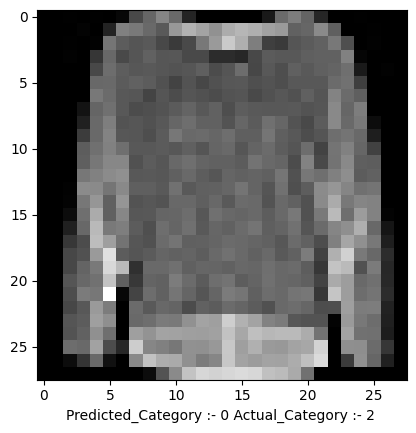

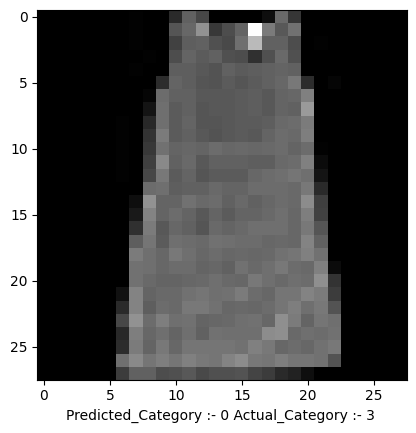

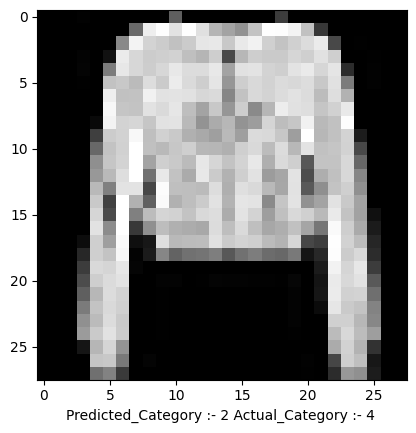

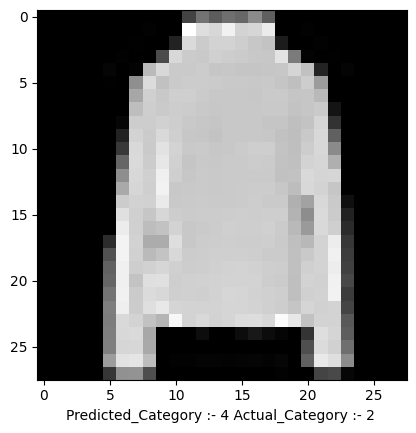

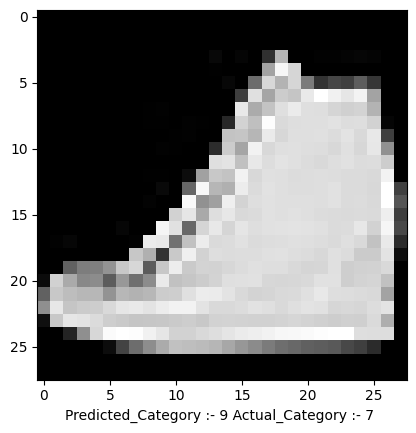

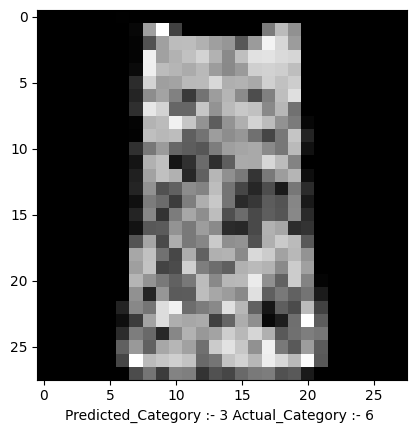

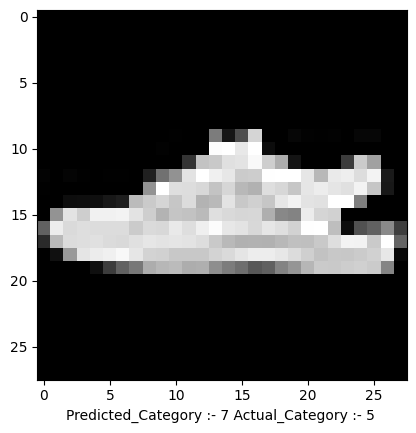

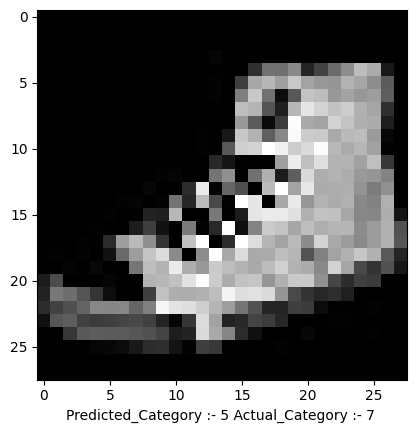

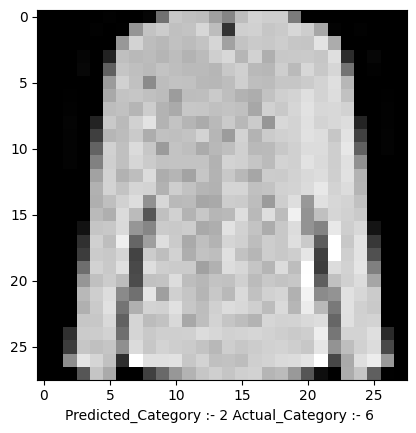

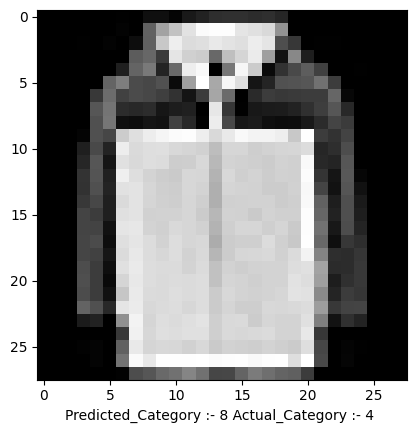

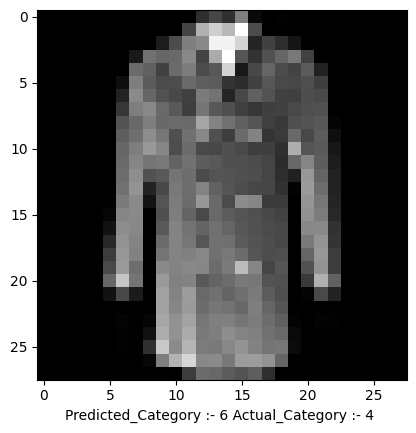

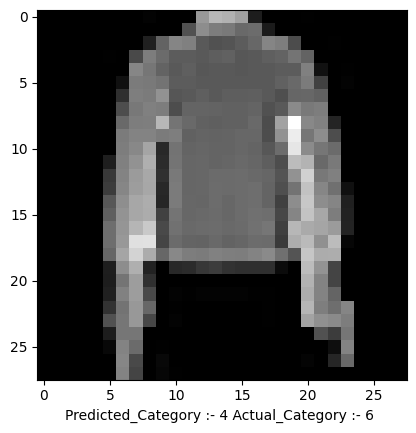

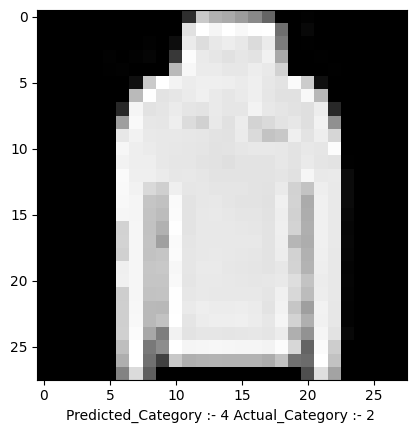

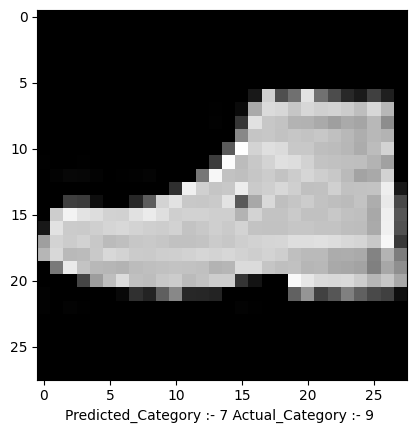

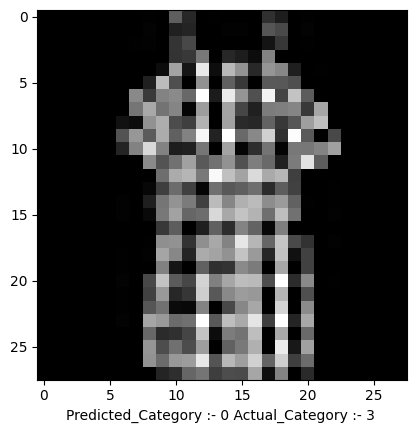

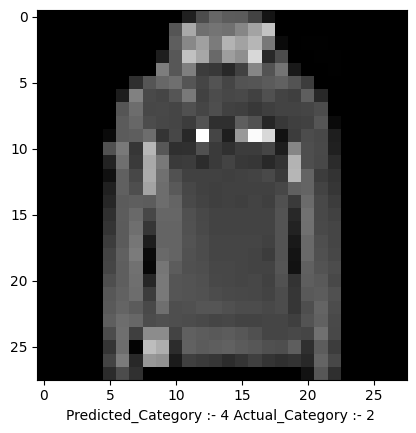

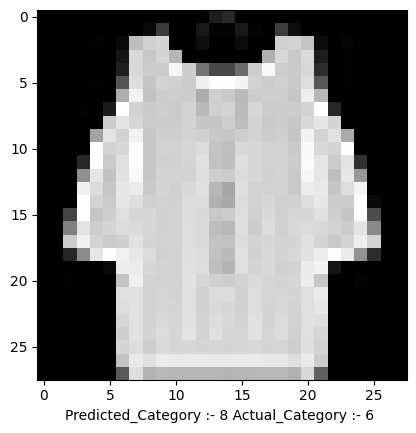

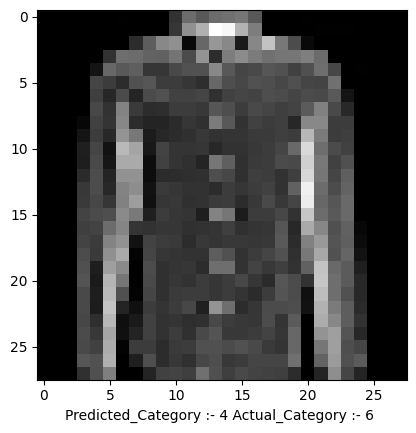

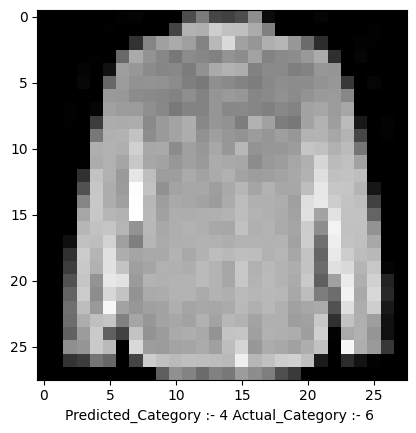

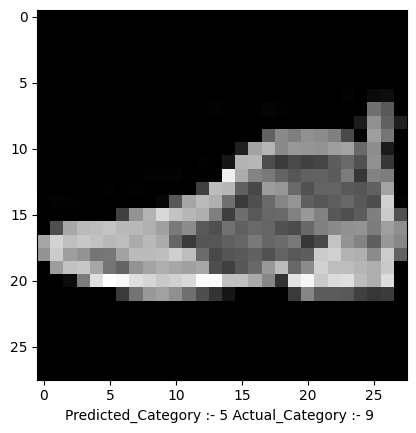

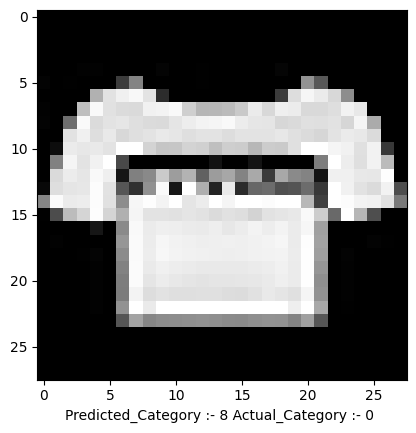

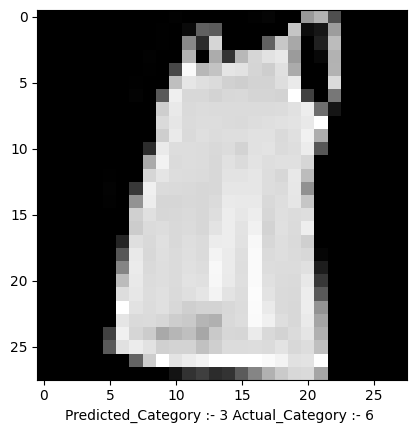

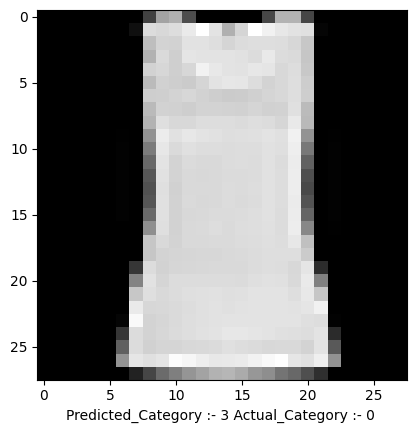

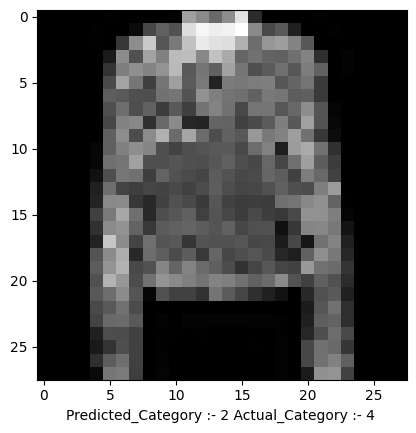

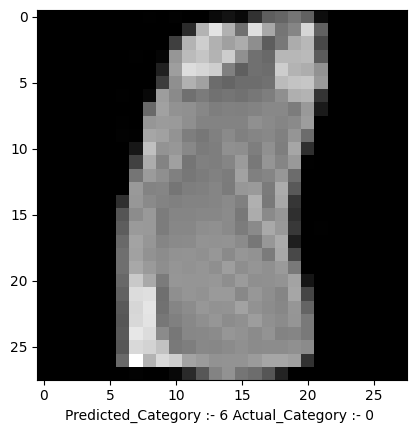

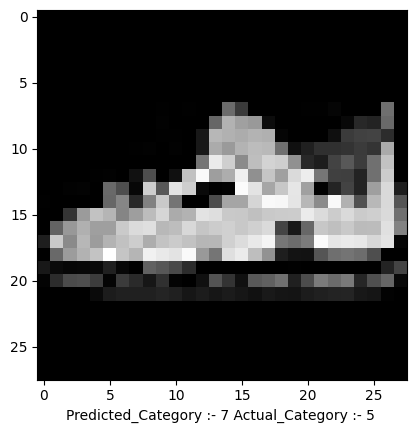

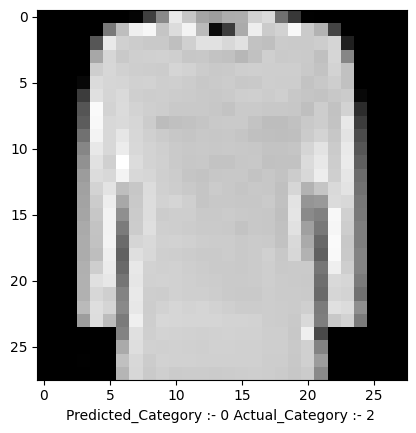

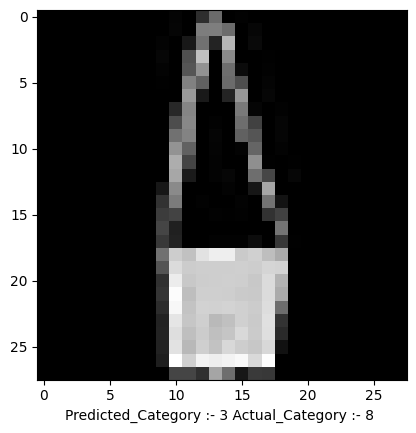

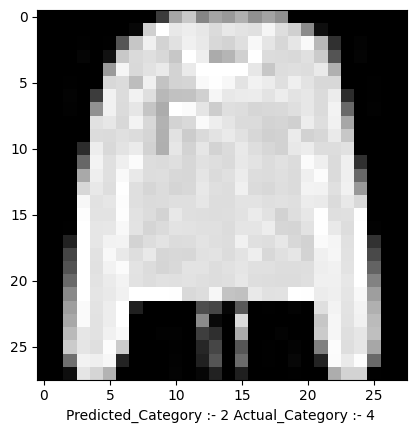

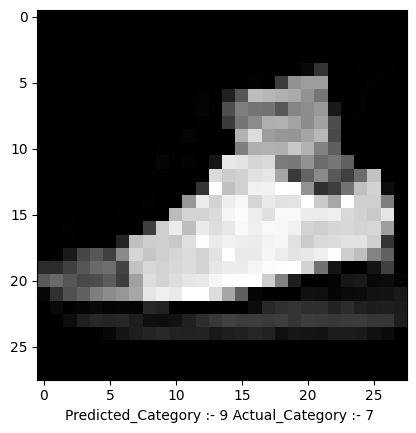

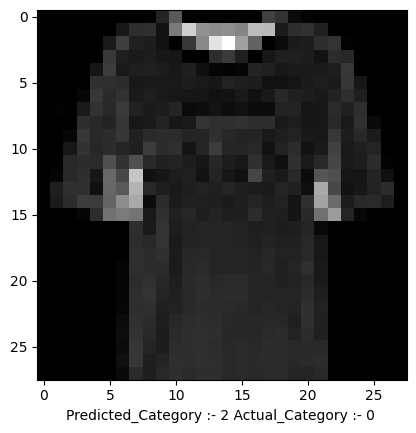

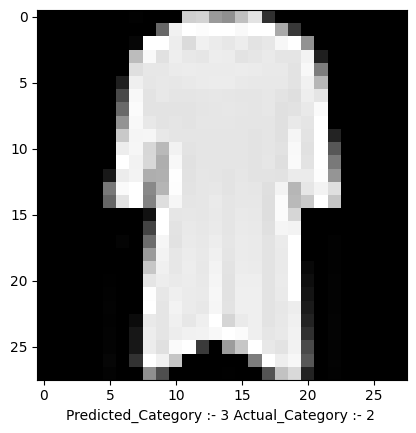

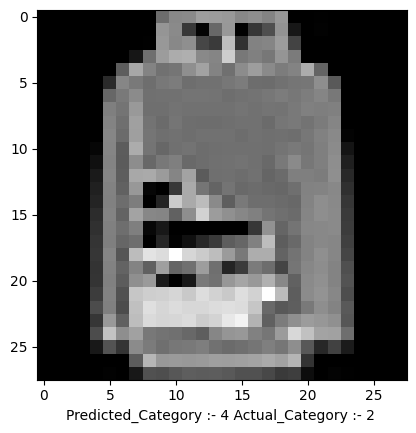

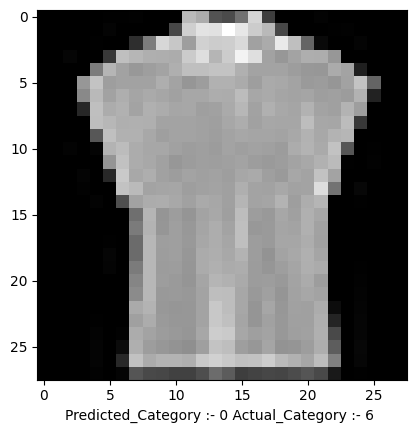

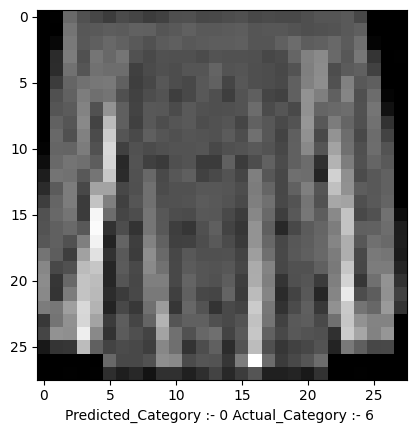

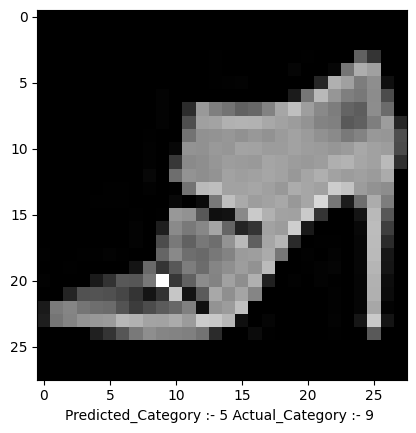

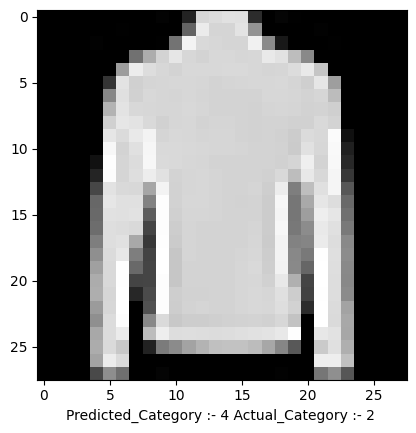

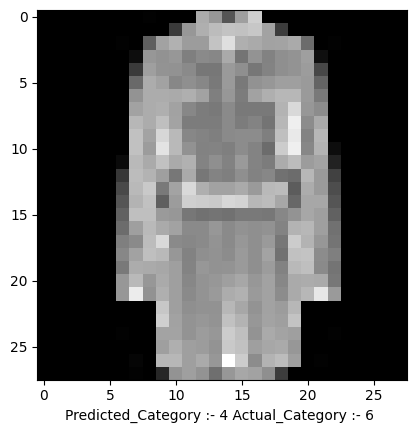

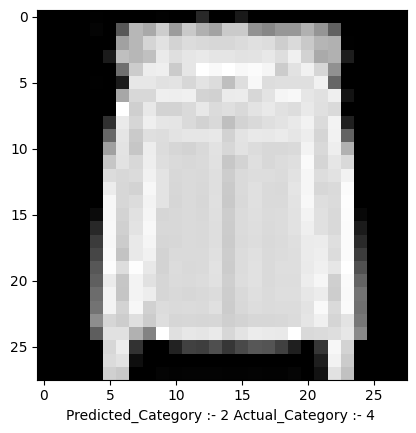

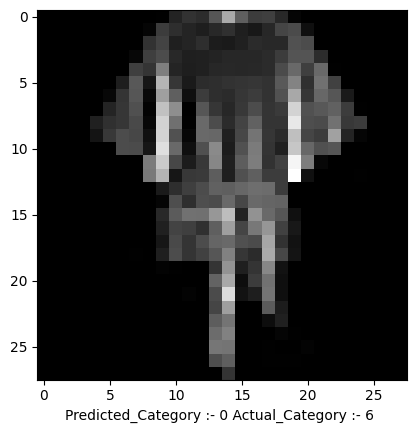

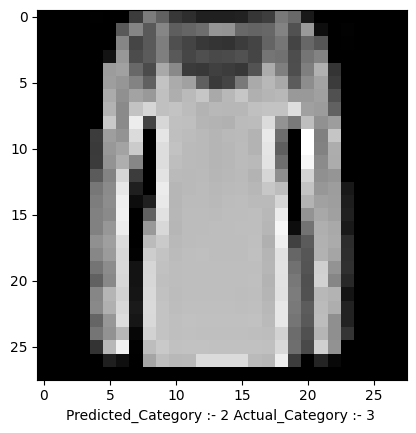

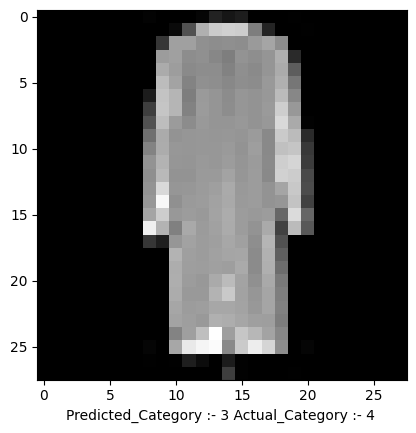

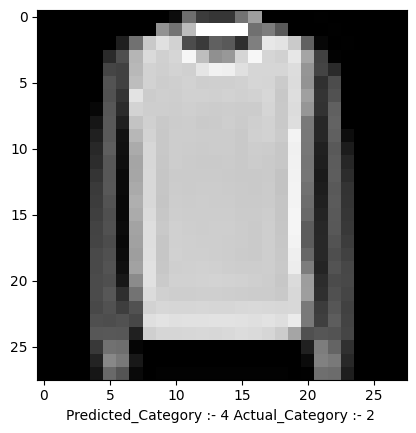

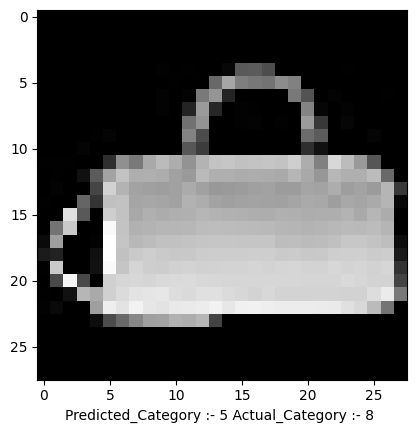

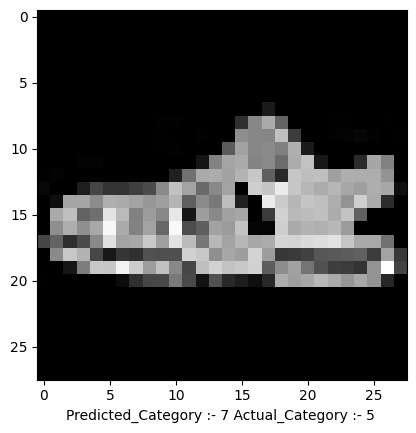

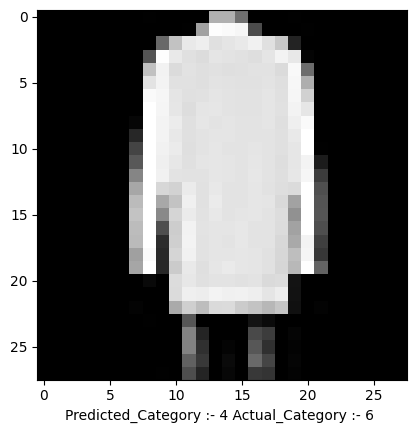

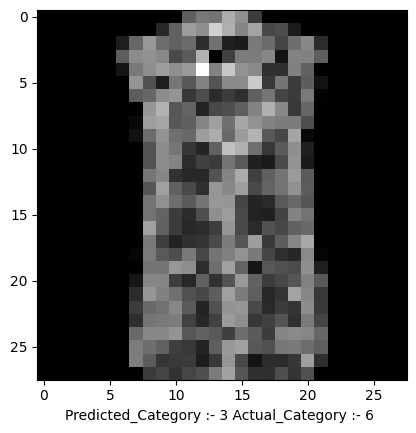

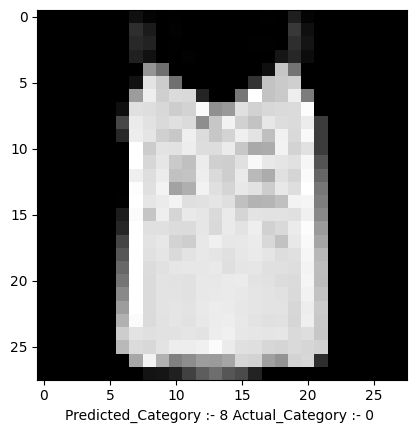

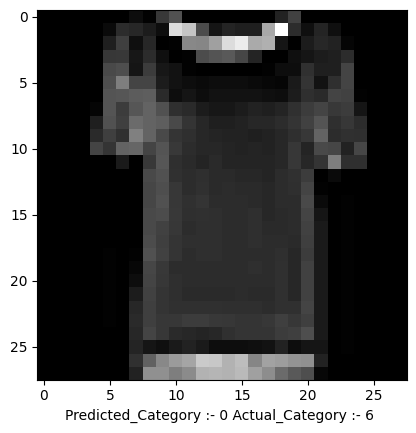

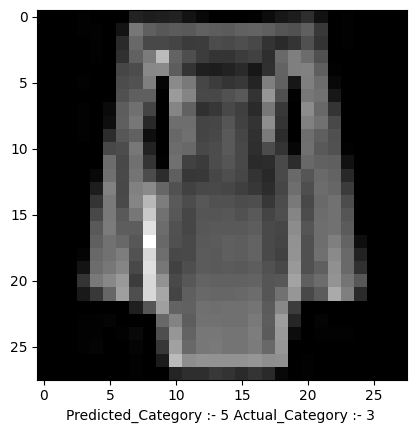

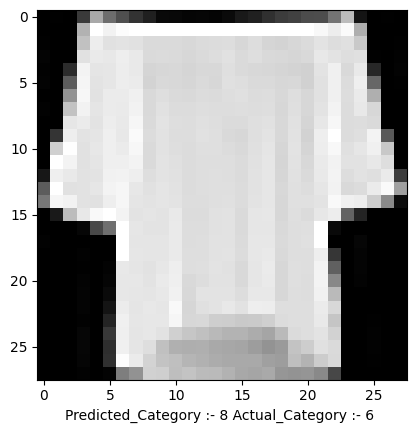

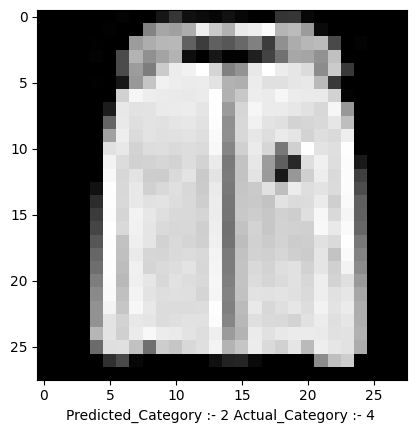

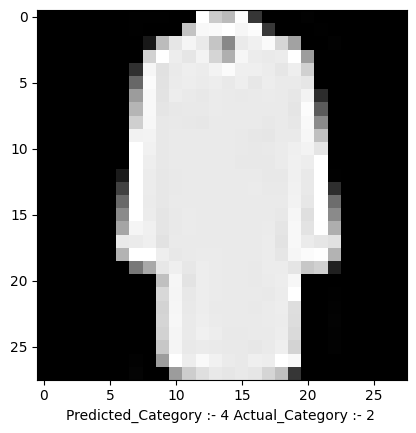

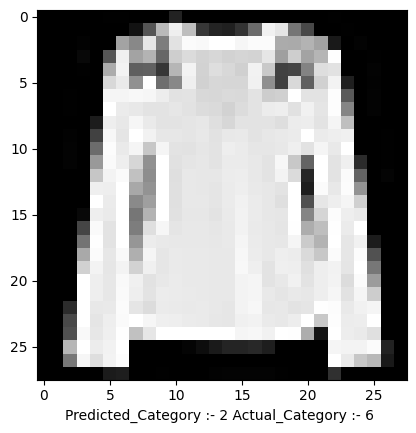

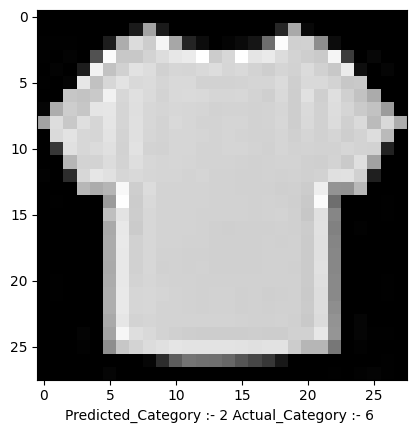

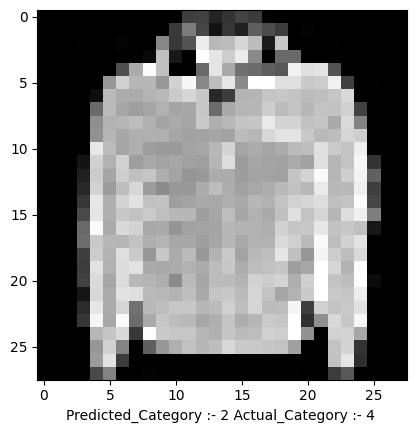

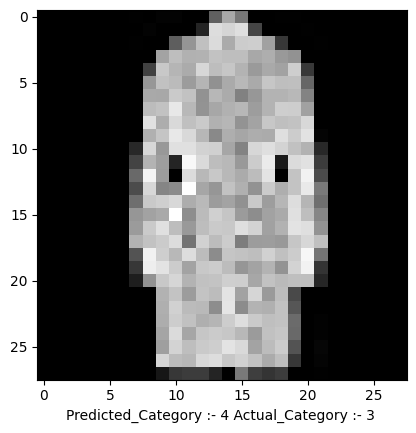

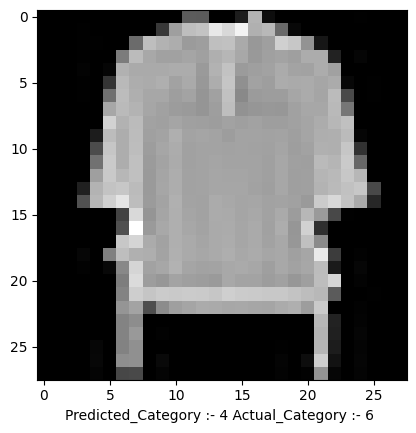

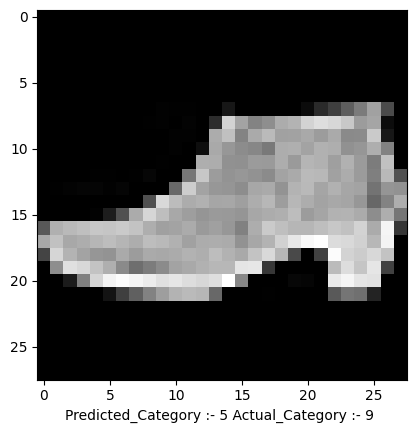

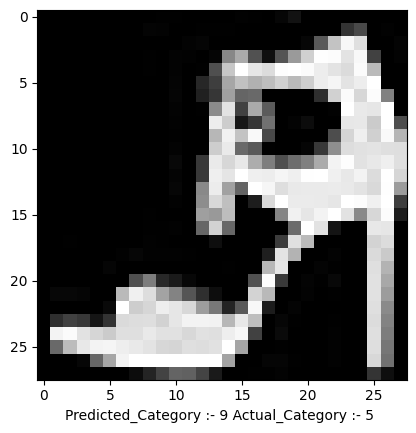

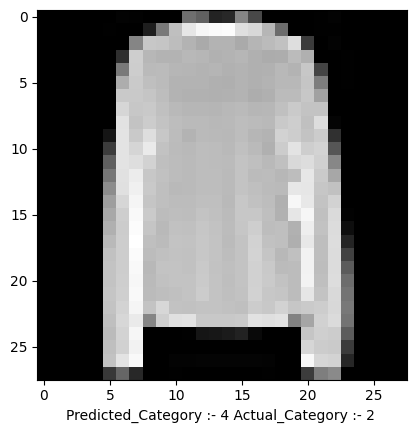

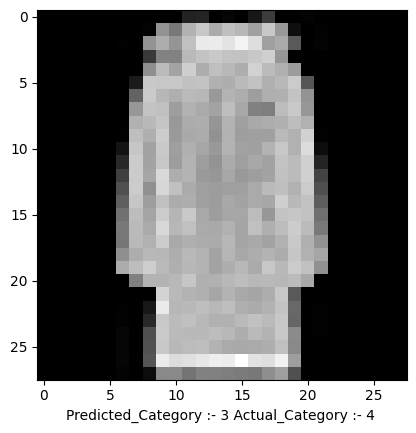

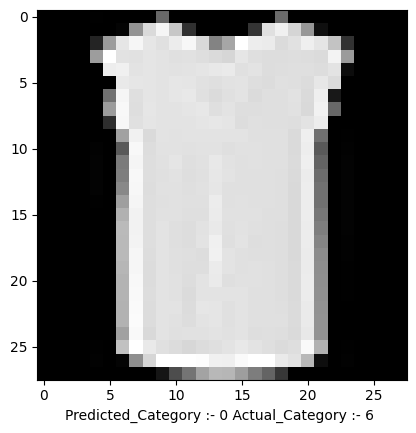

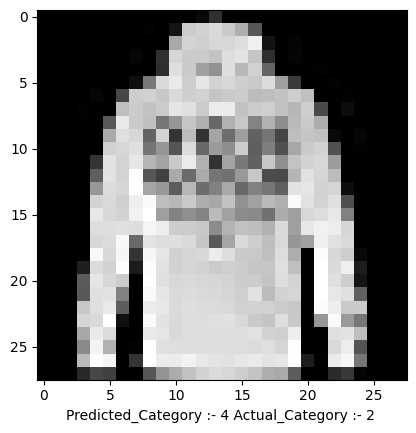

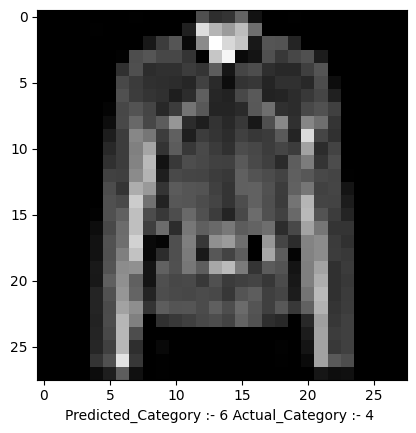

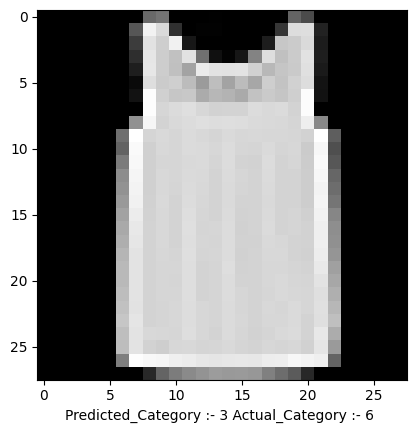

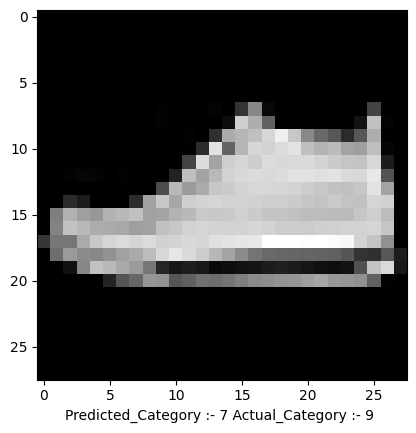

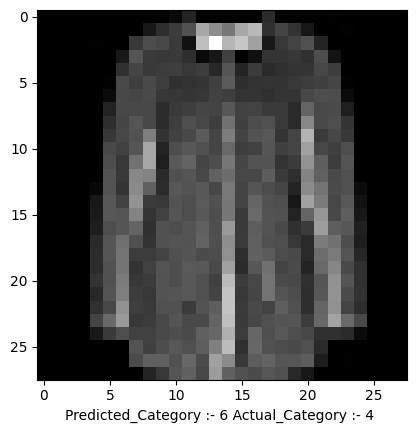

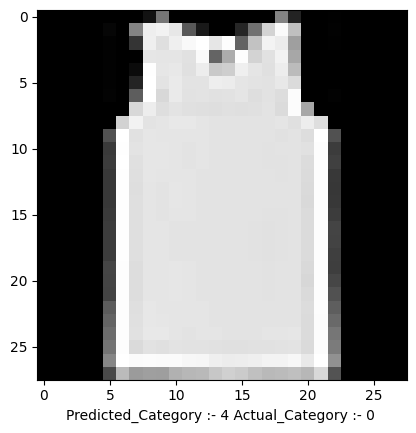

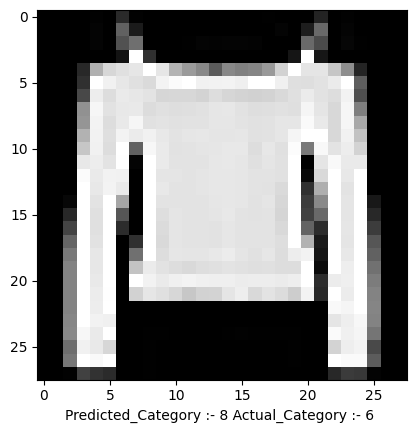

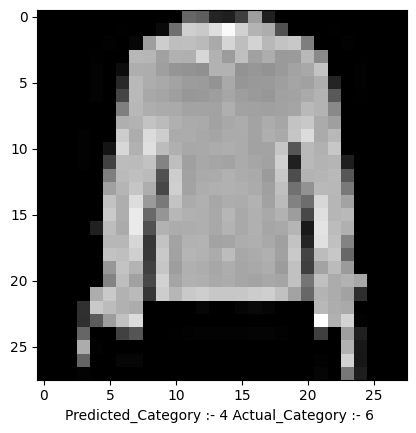

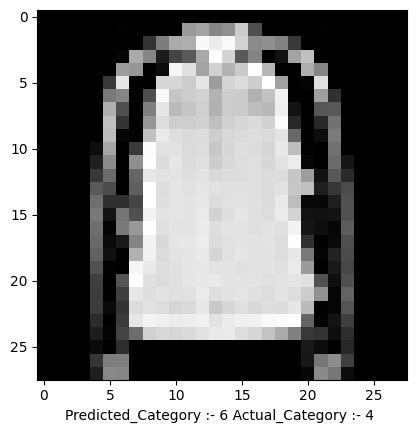

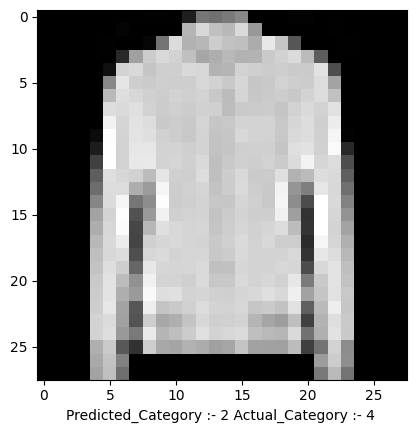

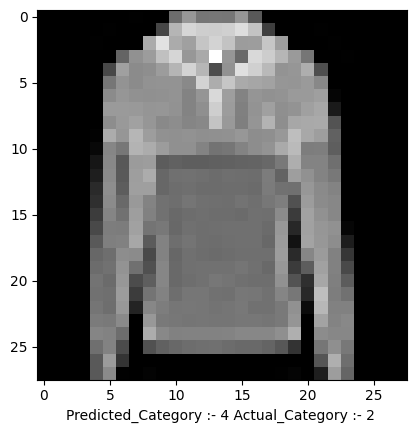

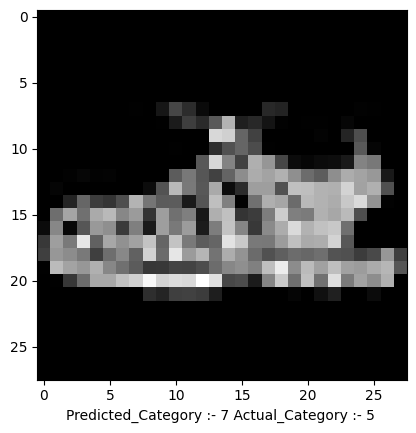

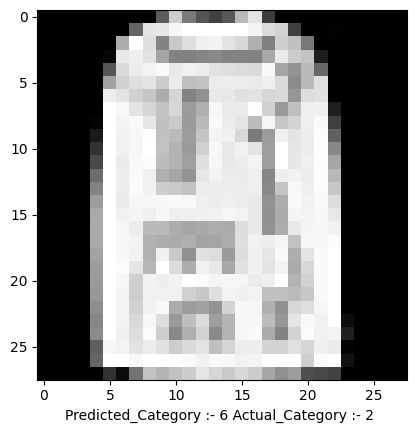

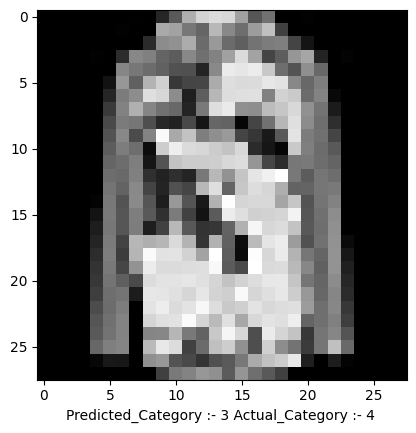

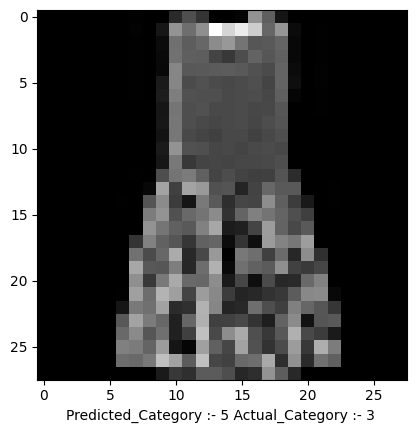

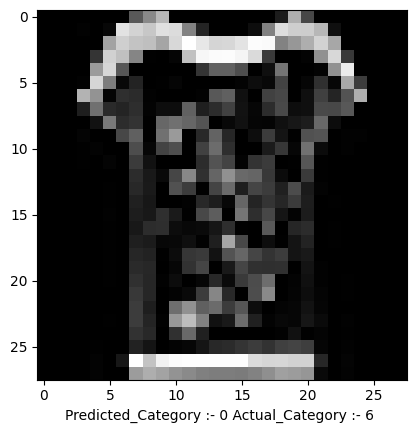

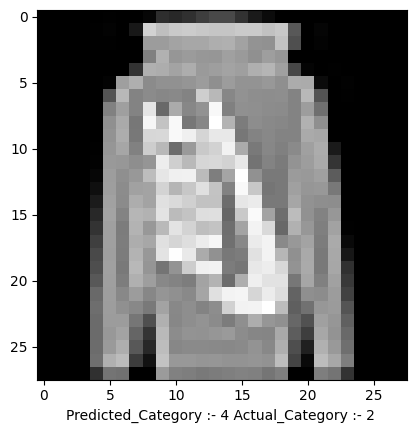

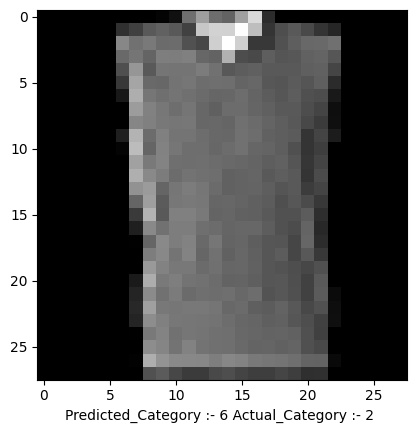

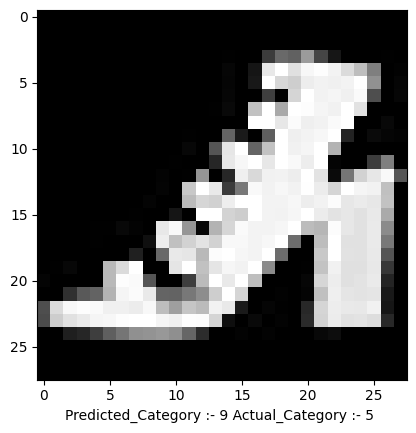

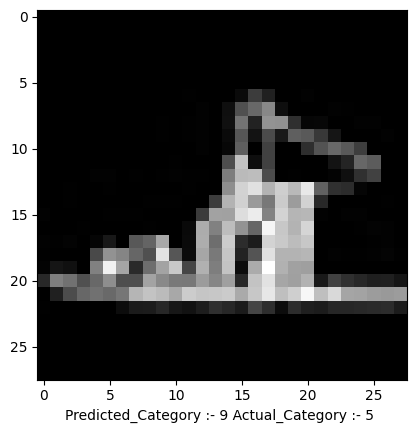

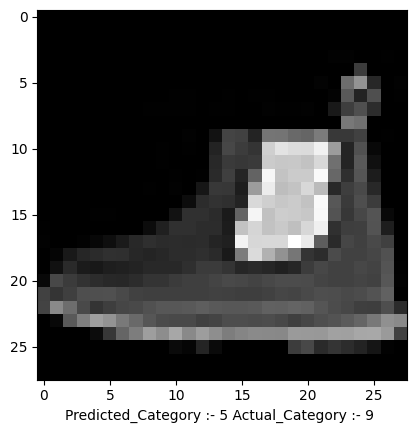

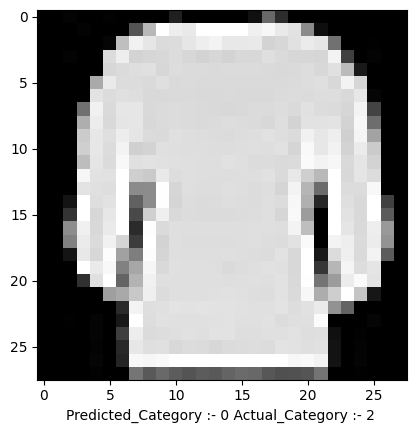

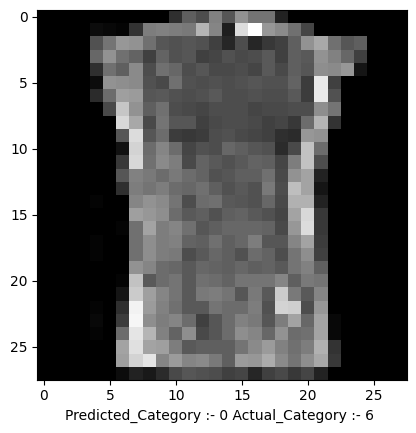

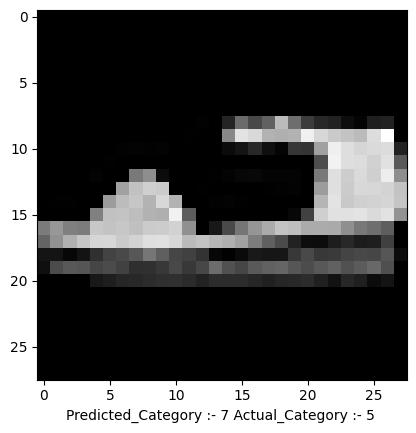

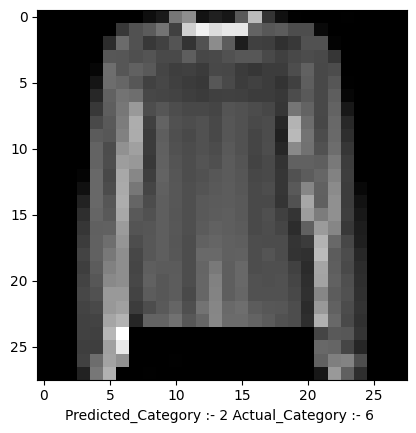

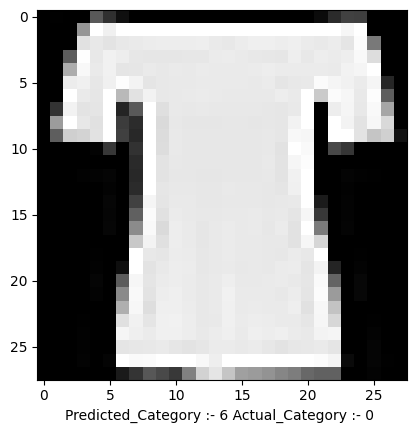

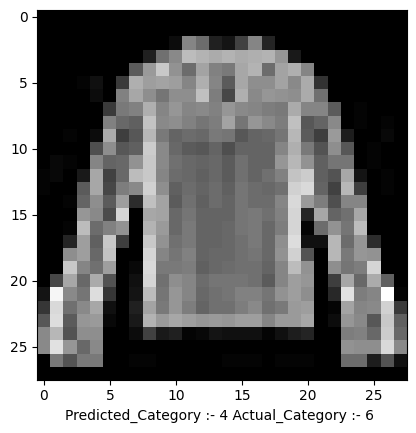

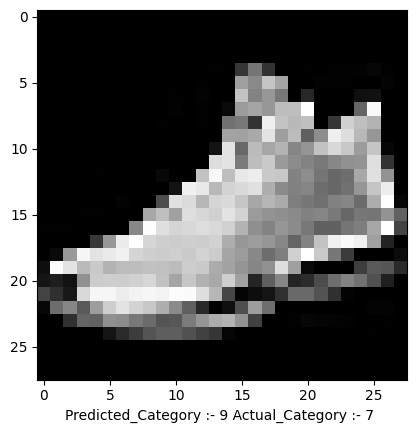

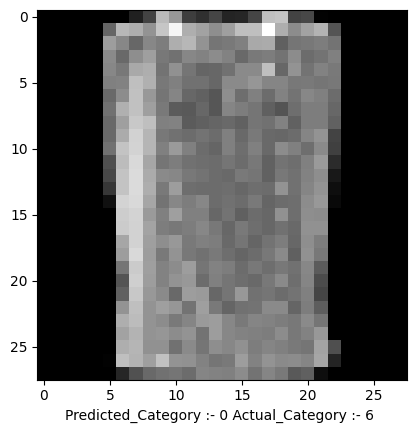

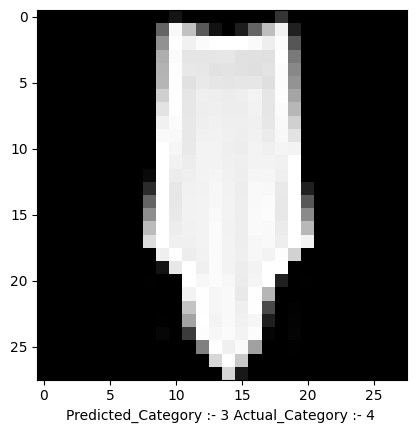

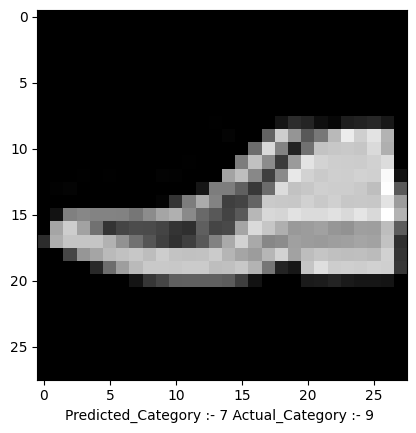

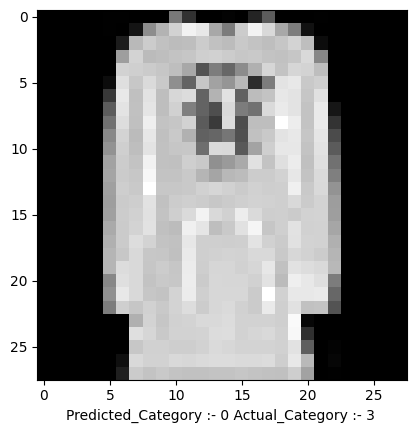

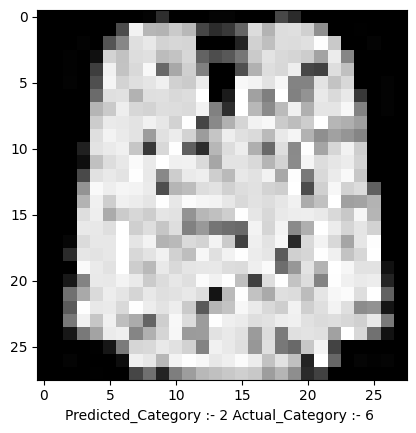

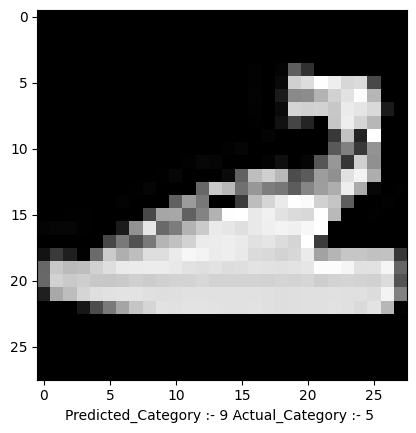

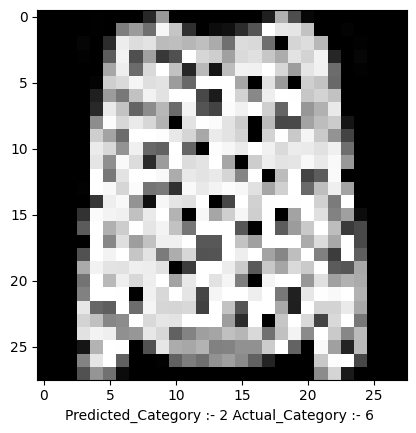

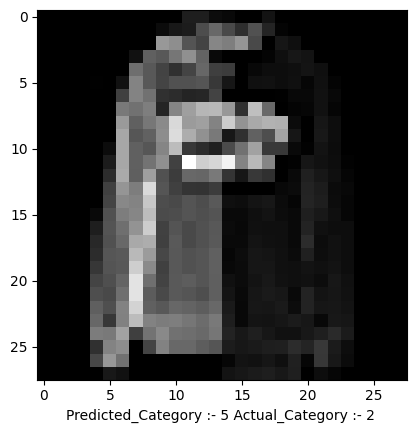

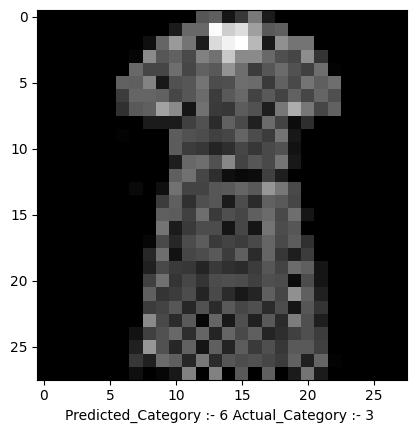

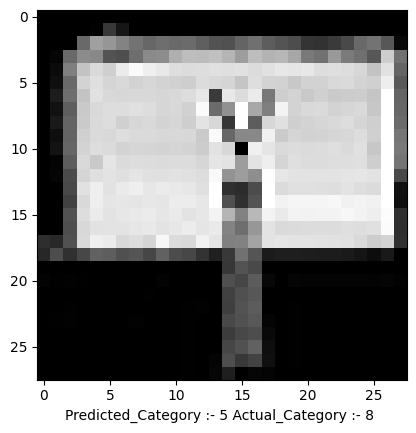

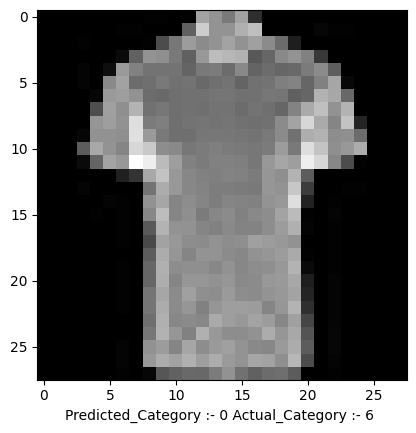

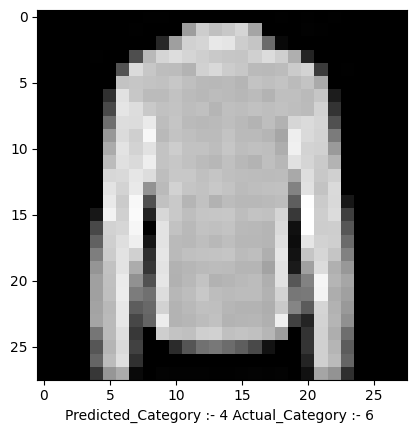

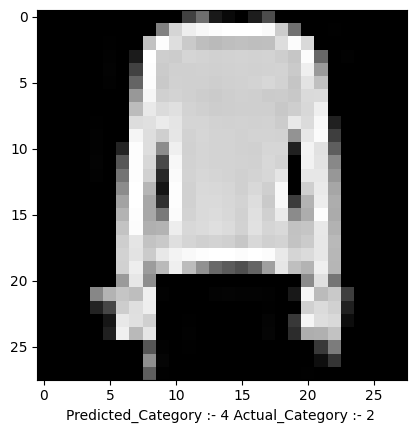

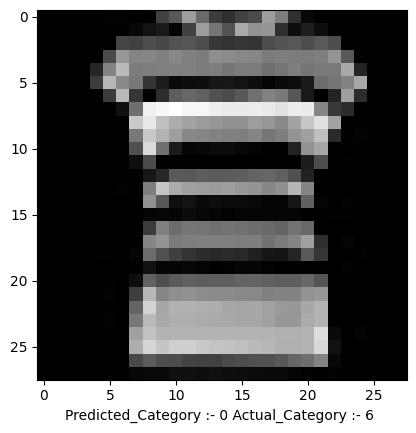

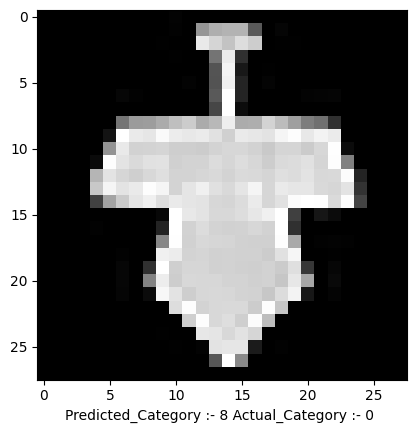

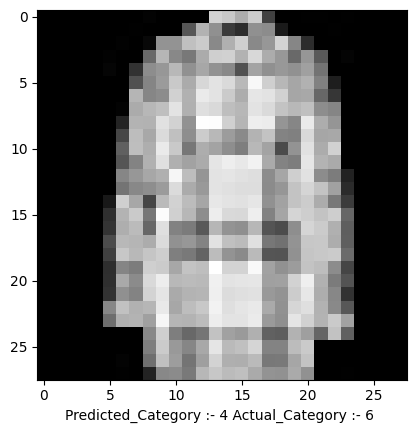

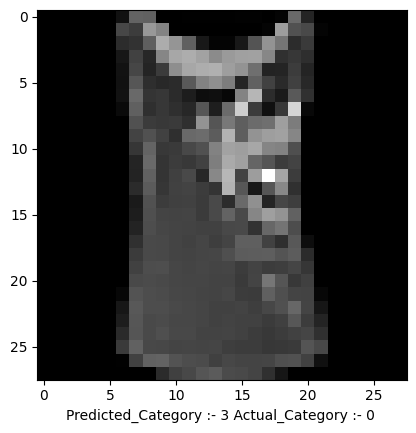

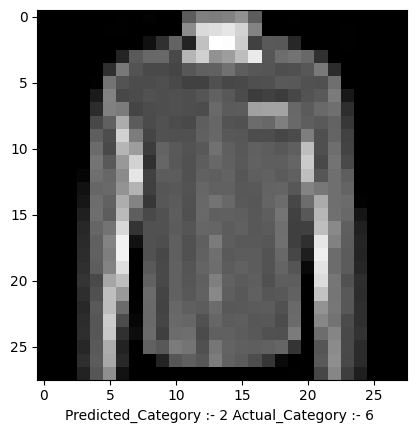

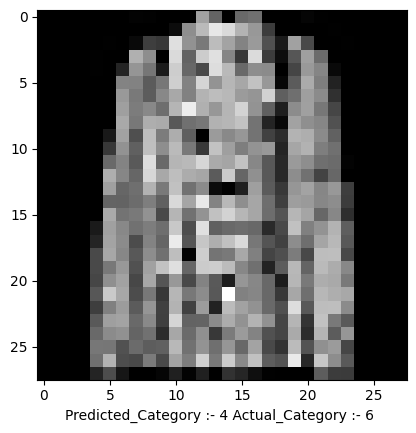

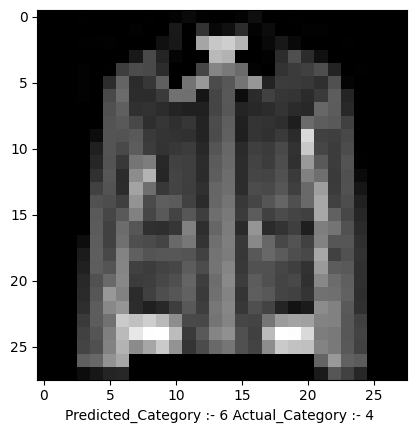

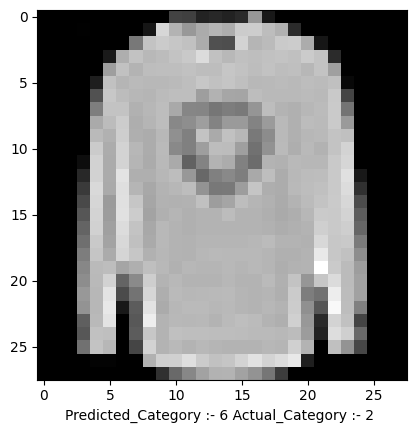

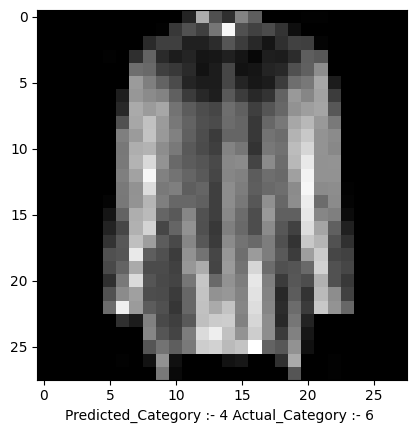

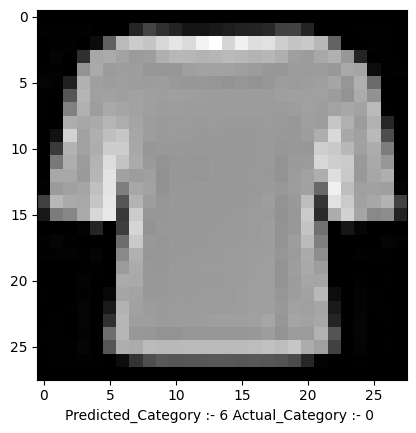

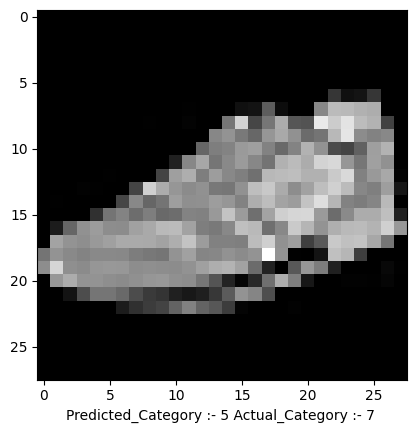

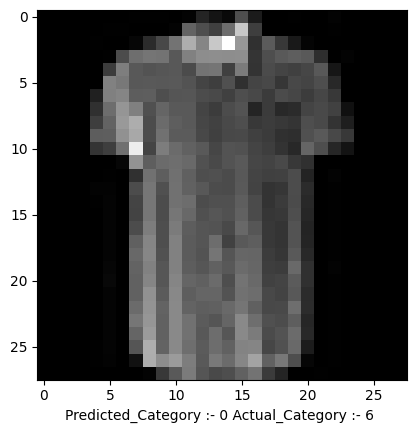

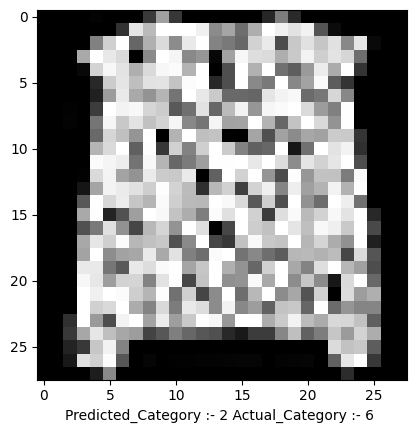

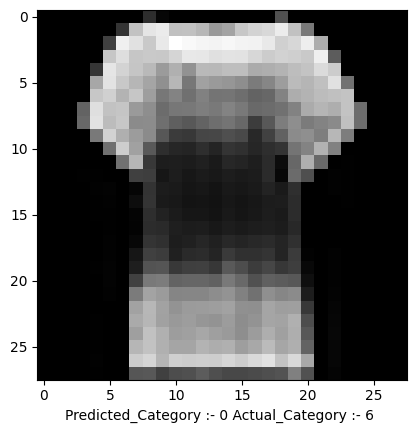

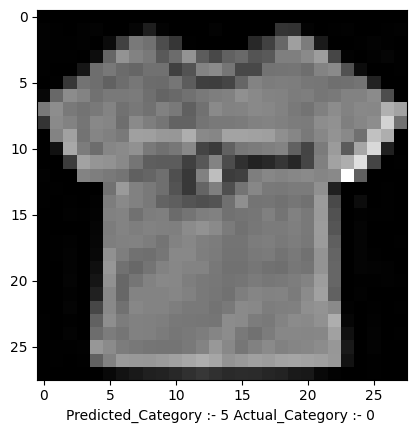

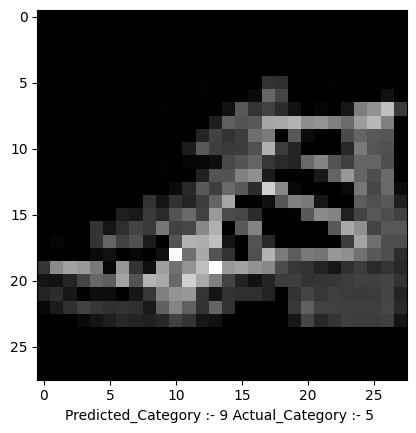

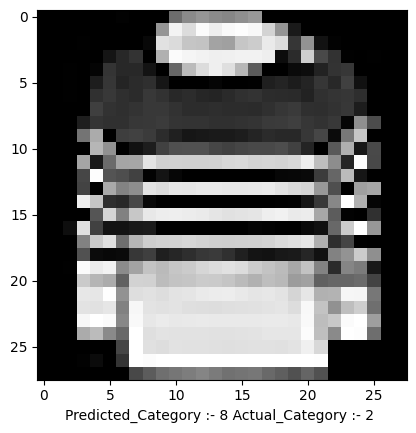

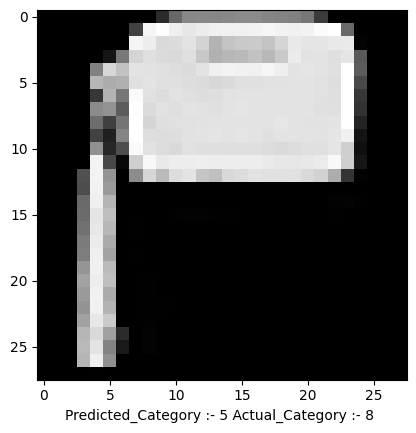

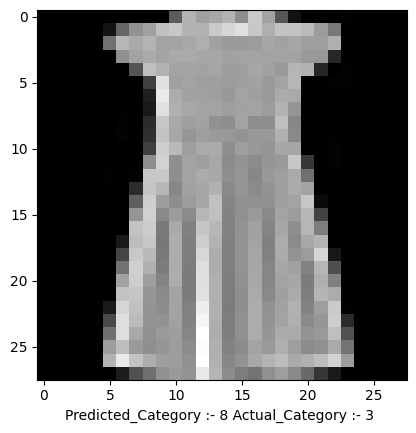

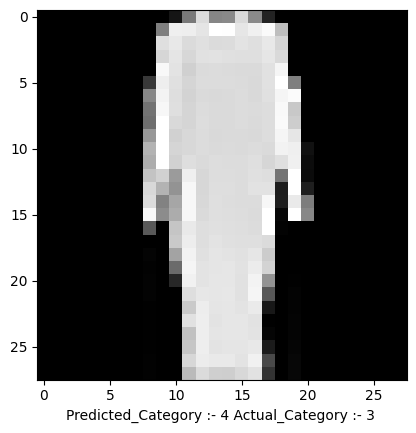

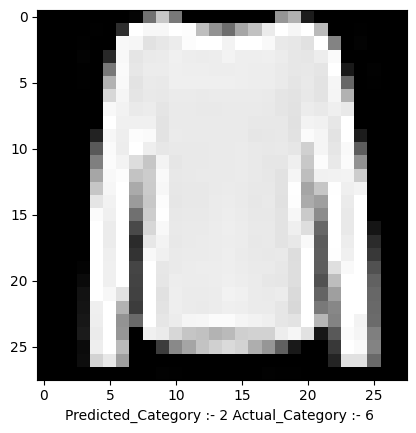

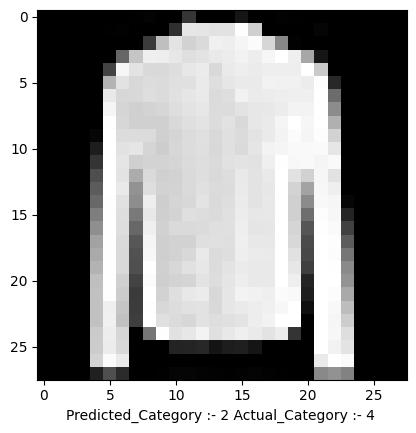

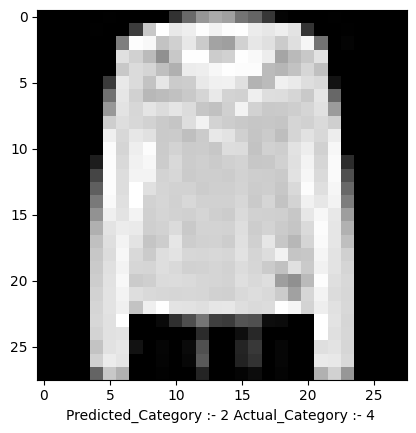

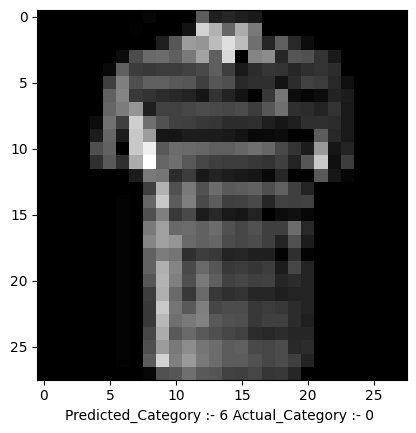

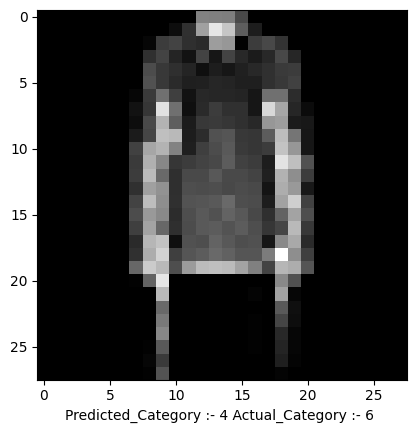

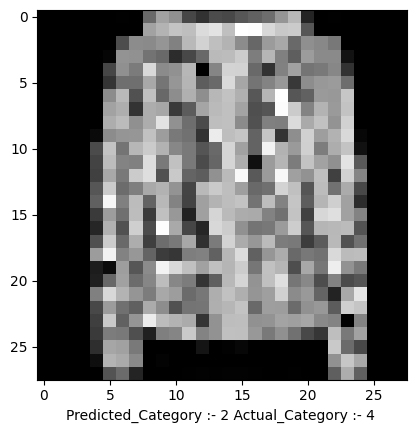

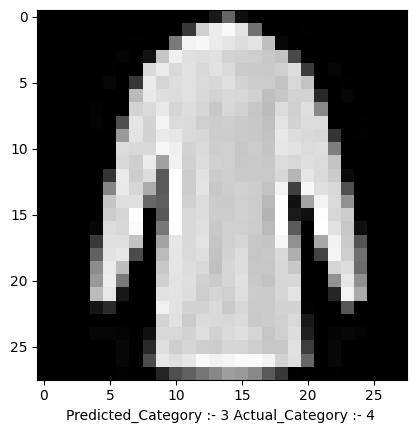

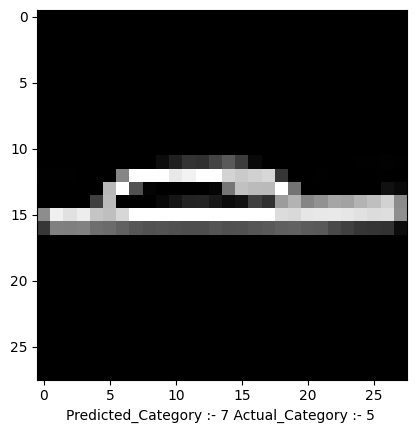

In [ ]:
output1 = Logistic_model.evaluate(X_CVS)
output1.shape
for i in range(X_CVS.shape[1]):
  if output1[0,i] != Y_CVS[i,0]:
    plt.imshow(X_CVS[i,:].reshape(28,28),cmap = "gray")
    plt.xlabel("Predicted_Category :- " + str(output1[0,i])+" Actual_Category :- "+ str(Y_CVS[i,0])+" ")
    plt.show()